# Wczytanie, wyświetlanie danych


In [1]:
#Importowanie danych z lokalnego dysku
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/pro1d/'
housing = pd.read_csv(path + 'Housing.csv', header='infer')

Mounted at /content/drive


In [2]:
#Wymiar danych: Funkcja  DataFrame.shape
print(housing.shape)

#liczba atrybutów
print(len(housing.columns))

#Lista atrybutów z typami: Funkcja:  DataFrame.info
print(housing.info())

#czy wartości brakujące
print(housing.isnull())

#czy w ogóle są jakieś wartości brakujące
print(housing.isnull().values.any())

(20640, 10)
10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           Fal

# Wstępna eksploracja

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

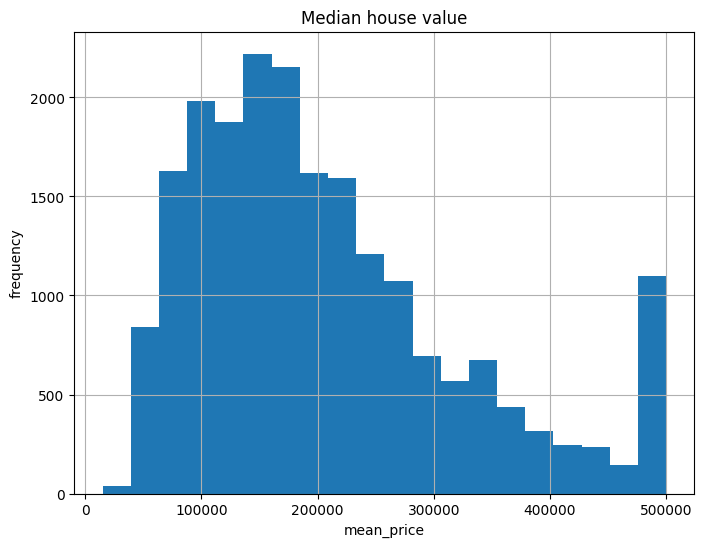

Unikatowe wartości w ocean proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Liczba unikatowych wartości: 5


<Figure size 640x480 with 0 Axes>

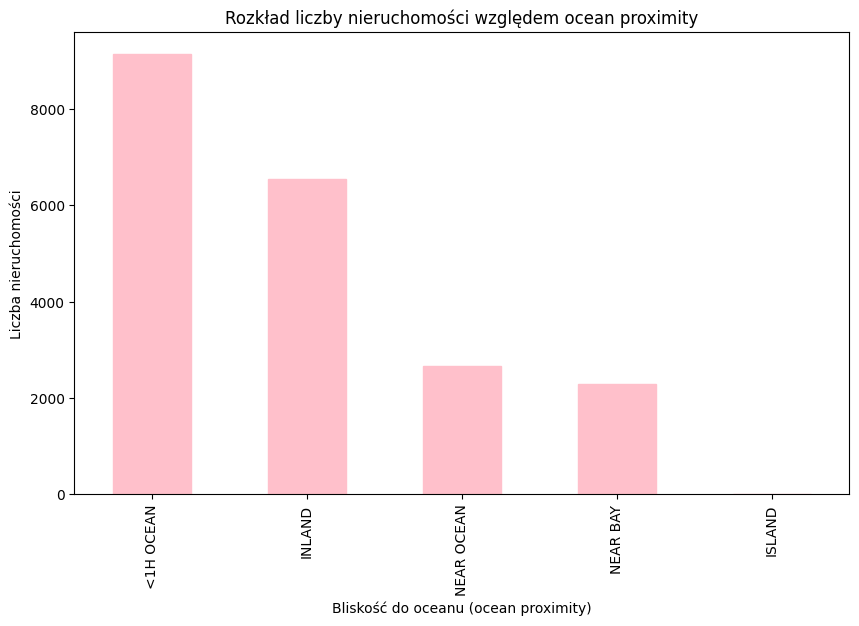

In [3]:
#Statystyka: Funkcja DataFrame.describe()
print(housing.describe())

#średnia cena mieszkań
print(housing['median_house_value'].mean())

#wskaźniki statystyczne dla median house value
print(housing['median_house_value'].describe())

#Histogram
%matplotlib inline
import matplotlib.pyplot as plt
housing['median_house_value'].hist(bins=20, figsize=(8,6))
plt.ylabel('frequency')
plt.xlabel('mean_price')
plt.title('Median house value')
plt.show()
plt.savefig("attribute_histogram_plots")
#rozkład asymetryczny lewostronnie

#wykres dla ocean proximity i unikatowe wartości
unikalne_wartosci = housing['ocean_proximity'].unique()
liczba_unikatowych = housing['ocean_proximity'].nunique()

print("Unikatowe wartości w ocean proximity:", unikalne_wartosci)
print("Liczba unikatowych wartości:", liczba_unikatowych)

plt.figure(figsize=(10, 6))
housing['ocean_proximity'].value_counts().plot(kind='bar', color='#ffc0cb', edgecolor='pink')
plt.title('Rozkład liczby nieruchomości względem ocean proximity')
plt.xlabel('Bliskość do oceanu (ocean proximity)')
plt.ylabel('Liczba nieruchomości')
plt.show()

# Wizualizacja

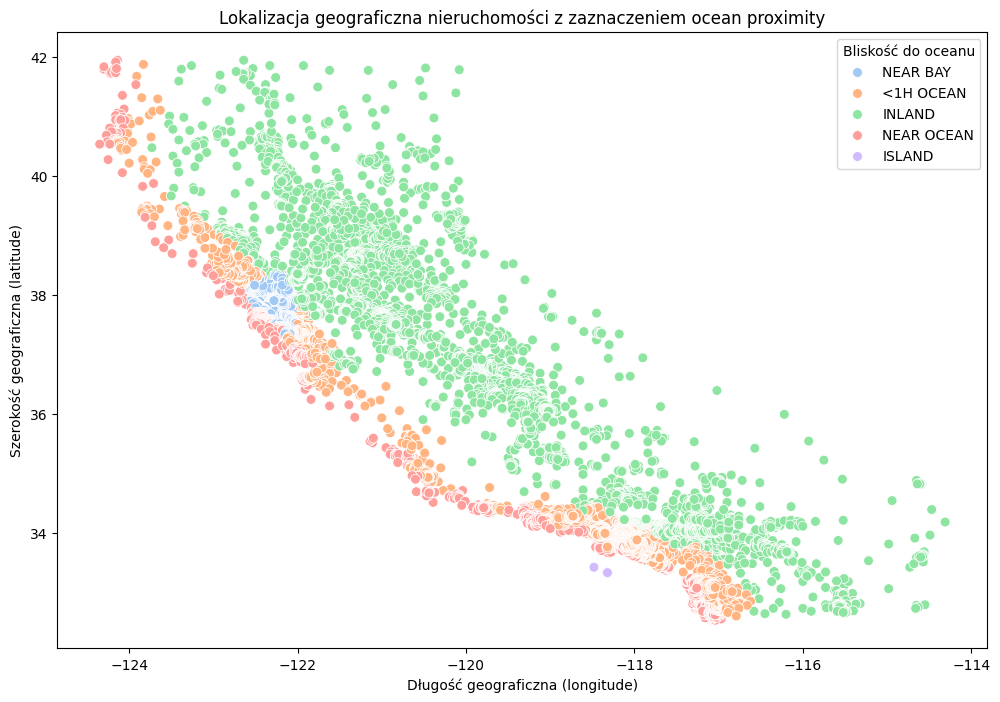

<Axes: xlabel='longitude', ylabel='latitude'>

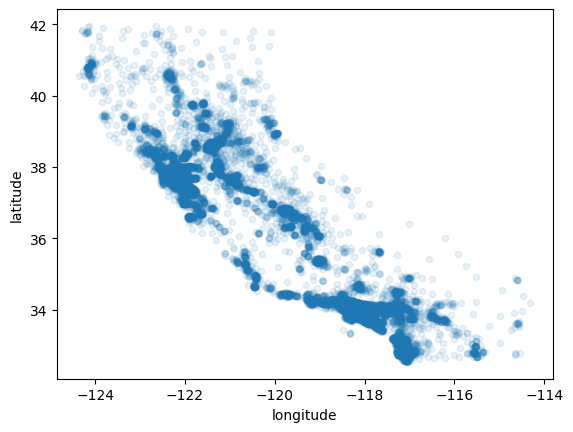

In [4]:
#lokalizacja geograficzna nieruchomości z zaznaczeniem, które znajdują się blisko morza.

from matplotlib.pyplot import savefig
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity', palette='pastel', s=50)
plt.title('Lokalizacja geograficzna nieruchomości z zaznaczeniem ocean proximity')
plt.xlabel('Długość geograficzna (longitude)')
plt.ylabel('Szerokość geograficzna (latitude)')
plt.legend(title='Bliskość do oceanu')
plt.show()

#
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#save_fig("better_visualization_plot")

# Analiza korelacji

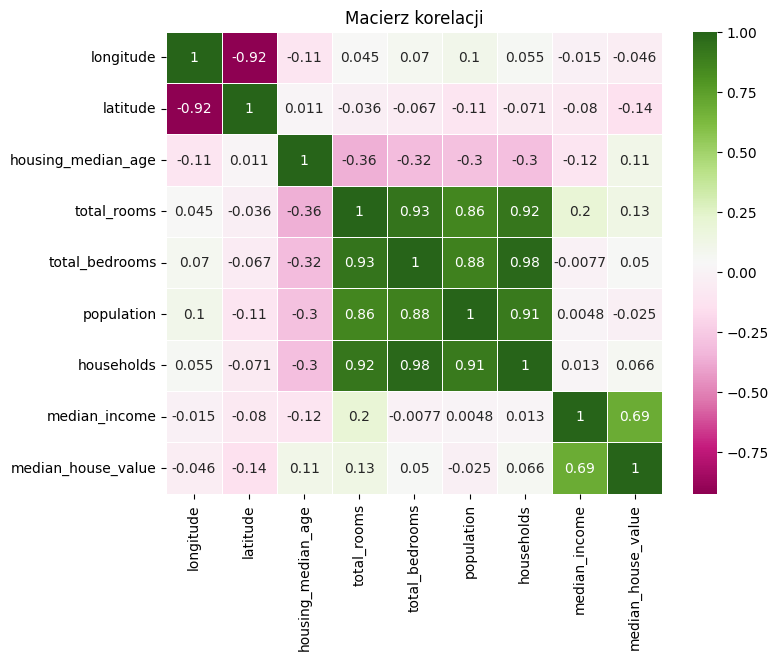

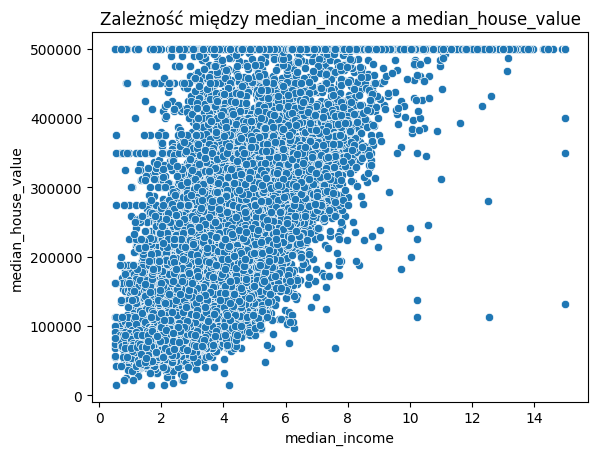

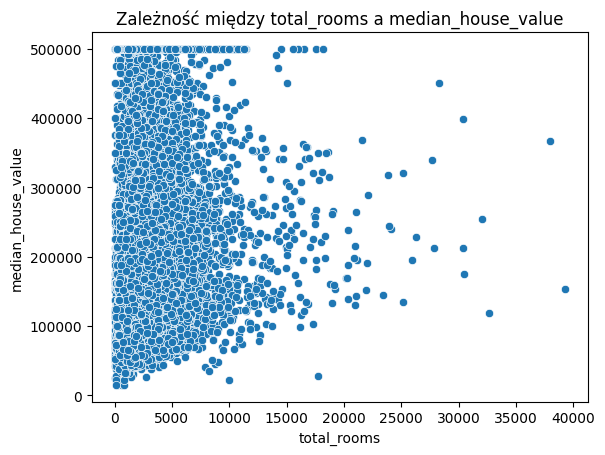

5 najważniejszych zmiennych najbardziej skorelowanych z median_house_value:
Index(['median_income', 'total_rooms', 'housing_median_age', 'households',
       'total_bedrooms'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Usunięcie zmiennej kategorycznej 'ocean_proximity' i obliczenie macierzy korelacji
housing_nums_only = housing.drop('ocean_proximity', axis=1)
correlation_matrix = housing_nums_only.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', linewidths=0.7)
plt.title('Macierz korelacji')
plt.show()

# Wykresy punktowe dla dwóch atrybutów najbardziej skorelowanych z median-house-value
# Zidentyfikowanie dwóch najbardziej skorelowanych zmiennych z 'median_house_value'
top_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
most_correlated_features = top_correlations.index[1:3]  # Pomijamy 'median_house_value' jako 1.

# Wykresy punktowe
for feature in most_correlated_features:
    sns.scatterplot(x=feature, y='median_house_value', data=housing)
    plt.title(f'Zależność między {feature} a median_house_value')
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.show()

#  Pięć najważniejszych zmiennych skorelowanych z median-house-value
top_5_features = top_correlations.index[1:6]
print("5 najważniejszych zmiennych najbardziej skorelowanych z median_house_value:")
print(top_5_features)


# Konwertowanie wartości symbolicznych na numeryczne

In [ ]:
# konwertowanie brakujacych wartosci na srednia i kodowanie ocean proximity
housing['ocean_proximity'] = housing['ocean_proximity'].astype('category').cat.codes
housing.fillna(housing.mean(), inplace=True)


# Podział zbioru danych, modelowanie i walidacja

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer


housing_features = housing.drop("median_house_value", axis=1)
housing_labels = housing["median_house_value"].copy()


train_set, test_set = train_test_split(housing, test_size=0.3, random_state=42)
print(test_set)

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("median_house_value", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_num)

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

mape = np.mean(np.abs((housing_labels - housing_predictions) / housing_labels)) * 100

print("Błąd względny:", mape, "%")
print("RMSE:", lin_rmse)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0      537.870553   
3024     -119.46     35.14                30.0       2943.0      537.870553   
15663    -122.44     37.80                52.0       3830.0      537.870553   
20484    -118.72     34.28                17.0       3051.0      537.870553   
9814     -121.93     36.62                34.0       2351.0      537.870553   
...          ...       ...                 ...          ...             ...   
17505    -121.90     37.36                47.0       1007.0      245.000000   
13512    -117.32     34.11                41.0       1229.0      302.000000   
10842    -117.91     33.67                16.0       7961.0     2276.000000   
16559    -121.28     37.82                10.0       9205.0     1774.000000   
5786     -118.24     34.15                17.0       5282.0     1605.000000   

       population  households  median_income  media

# Odfltrowanie wartości odstających

In [ ]:
Q1_rooms = housing["total_rooms"].quantile(0.25)
Q3_rooms = housing["total_rooms"].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

Q1_bedrooms = housing["total_bedrooms"].quantile(0.25)
Q3_bedrooms = housing["total_bedrooms"].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

housing_no_outliers = housing[
    (housing["total_rooms"] >= lower_bound_rooms) & (housing["total_rooms"] <= upper_bound_rooms) &
    (housing["total_bedrooms"] >= lower_bound_bedrooms) & (housing["total_bedrooms"] <= upper_bound_bedrooms)
]

print("Rozmiar przed usunięciem danych:", housing.shape)
print("Rozmiar po usunięciu danych:", housing_no_outliers.shape)


housing_labels_no_outliers = housing_no_outliers["median_house_value"].copy()
housing_features_no_outliers = housing_no_outliers.drop("median_house_value", axis=1)

housing_prepared_no_outliers = full_pipeline.fit_transform(housing_features_no_outliers)

lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(housing_prepared_no_outliers, housing_labels_no_outliers)

housing_predictions_no_outliers = lin_reg_no_outliers.predict(housing_prepared_no_outliers)

#RMSE i relative error

lin_mse_no_outliers = mean_squared_error(housing_labels_no_outliers, housing_predictions_no_outliers)
lin_rmse_no_outliers = np.sqrt(lin_mse_no_outliers)

mape_new = np.mean(np.abs((housing_labels_no_outliers - housing_predictions_no_outliers) / housing_labels_no_outliers)) * 100
print("Błąd względny:", mape_new, "%")
print("RMSE po usunięcia danych:", lin_rmse_no_outliers)

print(housing)

Rozmiar przed usunięciem danych: (20640, 10)
Rozmiar po usunięciu danych: (19020, 10)
Błąd względny: 28.89415371424195 %
RMSE po usunięcia danych: 67946.10246228085
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.

# Tworzenie nowych atrybutów

In [ ]:
from sklearn.preprocessing import FunctionTransformer

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)


housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs.drop(["total_rooms", "total_bedrooms", "population"], axis=1, inplace=True)
housing_extra_attribs.head()

num_attribs = list(housing_extra_attribs.drop(["median_house_value", "ocean_proximity"], axis=1))


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), ["ocean_proximity"]),
])

housing_labels = housing_extra_attribs["median_house_value"].copy()
housing_features = housing_extra_attribs.drop("median_house_value", axis=1)


housing_prepared = full_pipeline.fit_transform(housing_features)


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


housing_predictions = lin_reg.predict(housing_prepared)


lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

mape_new = np.mean(np.abs((housing_labels - housing_predictions) / housing_labels)) * 100

print("Błąd względny po usunięciu danych:", mape_new, "%")
print("RMSE po usunięcia danych:", lin_rmse)

Błąd względny po usunięciu danych: 29.99787809907654 %
RMSE po usunięcia danych: 71530.42563895062
